# ADA - CopyPaste

## 1. Imports & Initializations

In [1]:
#Basics
import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
    #sns.set_palette('Blues')

#OS/Extras
import pickle
import os
directory = os.getcwd()
list_of_files = os.listdir(directory)
import re #Regular Expression -> https://docs.python.org/2/library/re.html#module-re
import pycountry #For looping in countries
# for country in pycountry.countries:
#     print(country.name + " " + country.alpha_2)

#Web
import requests
from bs4 import BeautifulSoup
from urllib import parse
import folium
import json

#Stats/ML
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats.mstats import zscore
from sklearn.preprocessing import minmax_scale


#Text
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim import corpora, models
from collections import defaultdict

#Community detection
import community
import networkx as nx

## 2. Loading & Writting

In [101]:
#From CSV
path = "Data/microbiome.csv"
df = pd.read_csv(path, header=None, sep=',', na_values=['?', -9999], index_col=['Taxon','Patient']) #just one if no multi-index

#From Pickle
pd.read_pickle("df_pickle")
#or...
with open('df.pickle', 'rb') as handle:
    df = pickle.load(handle)

#From excel
df = pd.read_excel('Data/microbiome/MID2.xls', sheetname='Sheet 1',index_col=0, header=None)

#From scratch:
df = pd.DataFrame({'feature1':[632, 1638, 569, 115, 433, 1130, 754, 555],
                   'feature2':[1, 1, 1, 1, 2, 2, 2, 2],
                   'feature3':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
                             'Bacteroidetes', 'Firmicutes', 'Proteobacteria',
                             'Actinobacteria', 'Bacteroidetes']})

df_num = df[['feature1','feature2']] #somethings can only be done in numeric

#To CSV
df.to_csv("df.csv")

#To Pickle
df.to_pickle("df_pickle")
#or...
with open('df.pickle', 'wb') as handle:
    pickle.dump(df, handle)
    
#To JSON
with open('nations.json', 'w') as outfile:
    json.dump(d, outfile)

## 3. Porperties and Methods

In [195]:
# Of DataFrame
df.head()
df.tail()
df.shape
df.columns
df.dtypes
df.index
df.index.is_unique #check for unique index
df.describe()
df.isin(['Firmicutes','Bacteroidetes']) # Also works with intergers. Returns True/False dataframe
df.sort_index(ascending=False) #descending order
df.sort_values(ascending=[False,True], by=['feature1', 'feature2']) #double sorting
df.reset_index()
df1 = df_num.sum(axis=1) #sums through rows
df1 = df_num.corr()
df1 = df.transpose()
s1 = pd.Categorical(df.feature3)
df1 = df.sample(n=10, replace=False)

# Of Series
s = df.feature1 #s == Series
s.values
s.isnull()
s.notnull()
s.astype(str)
s.is_unique
s.unique() #returns the 'set'
s.value_counts()
s.max()
s.min()
s.sum()
s.mean()
s.sort_values(ascending=False) #descending order
s.astype(float).round(3) #three decimals
idx = s.rank(method='first', ascending=False)
s.replace(0, 1e-6)
l = s.tolist() #values to list

# Of Lists
l2 = list(s.values)
l2.append(1) #adds 1 at the end
l2.pop()#pops the 1
l2.count(10) #counts how many 10s

# Of Strings
string = 'abcd'
string.endswith('cd') #True/False
string.startswith('ab') #True/False
'bc' in string #True/False
str2 = string + 'e'
str2 = "abcd{0}".format('e') #allows numeric
string.lower()
string.upper()
string.find('b') #returns first index, -1 on failure
string.split('b')

['a', 'cd']

## 4. Handling Data

In [246]:
# Assignation
df['new'] = 0 #initialization of column to 0
df.set_value(5, 'feature1', 10) #(index,column,value)
s[1:4] = 10 #affects the dataframe because s is defined by pointer. With warning!
df1 = df.copy() #No pointer
df1['feature4'] = df.feature1 + df.feature2

# Selections
th = 500 #threshold

s = df['feature1']
s[s>th]

df1 = df.ix[:,['feature1','feature2']]
df1 = df.ix[[2,3],0:2] # Like matrix
df1 = df.ix[2:,'feature1':'feature3'] # Like matrix

df1 = df[df.feature1>th]
df1 = df.query('feature1>@th')

df1 = df.select(crit=(lambda x:not x%5),axis=0) #Takes only indexes 0-5-10...
df1 = df.filter(regex='feature') # keeps feature1,feature2,feature3. Accepts regular experession things!  re.search(regex, col) == True
df1 = df.filter(items=['feature1','feature4']) #keeps the ones present

# Discretization
df1 = pd.cut(df.feature1, [0,20,600], labels=['0-20','20-600'])
# df1 = pd.qcut(df.feature1,4) #percentiles

# Clean
df1 = df[pd.isnull(df)]
df1 = df.drop('feature3', axis=1) #1 for column, 0 for row
df.dropna(how='any', subset=['feature1','feature2'], axis=0, inplace=True) # 0 rows, 1 columns. how={‘any’, ‘all’}. thresh=xxx 
df.fillna(0, inplace=True) #fill with 0s
df.fillna(method='bfill', inplace=True) #fills with interpolation
df2 = df.drop_duplicates(subset=['feature1','feature2'],keep='first') # keep : {‘first’, ‘last’, False}

# Merging and joining
df2 = pd.concat([df,df1], axis=0) # 0 pastes on the bottom, 1 pastes on the right. join : {‘inner’, ‘outer’}, default ‘outer’. ignore_index :True/False
df2 = pd.merge(df, df1, left_on='feature1', right_on='feature1', sort=False) # how:{'left', 'right', 'outer', 'inner'}.

#Grouping
df1 = df.groupby('feature3').feature2.mean()
#or...
df1 = df.groupby('feature3')[['feature2']].mean()

# Reindex
df1 = df.rename(index={4: 'New cases', 1: 'Total deaths'})
df1 = df.rename(columns={'feature3':'Total deaths'})
df1 = df.set_index(['feature3','feature2'])
    # df1 = df1.ix[('Firmicutes',2),:] #now selection with parenthesis in multi-index
df2 = df1['feature1'].unstack('feature2') #from multiple index with 1 obs, to matrix with feature3 as rows and feature2 as columns
df2 = df.pivot(index='feature3', columns='feature2', values='feature1') #same result as the previous 2 lines.
#pivot_table has more aggregation functs.
df1 = df1.reset_index() #need to copy. Or inplace=True
index1 = df.index.intersection(df1.index) #como un join inner 

df2

C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


feature2,1,2
feature3,,
Actinobacteria,10,754
Bacteroidetes,10,555
Firmicutes,632,433
Proteobacteria,10,10


## 5. Plotting

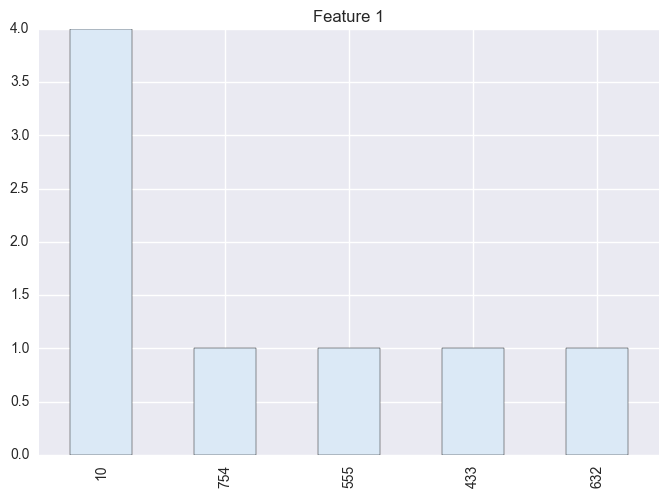

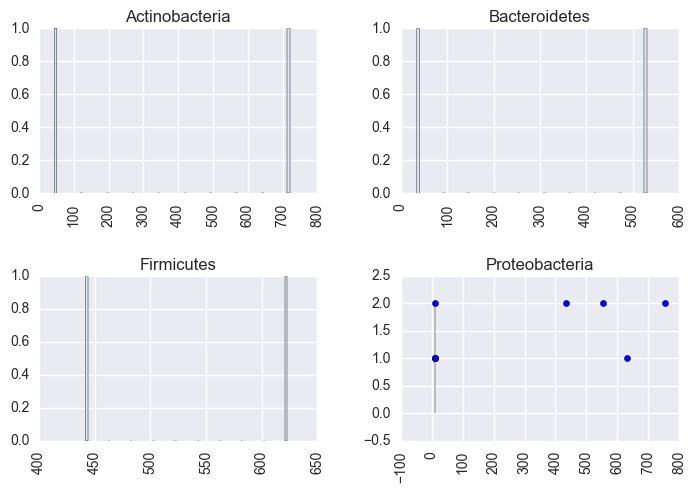

In [225]:
s.hist(bins=10) #Hist
df.feature1.value_counts().plot(kind='bar', title='Feature 1') #Barplot
df.feature1.hist(by=df['feature3'],rwidth=0.1,align='mid')
plt.scatter(df.feature1,df.feature2, c='b',marker='o',label='Male') #Scatter

In [ ]:
#The sentiment plot: Dunno really what is going on here, but just in case
sentiment = np.array(avg_sentiment_countries['Avg_Sentiment'])

colors = plt.cm.RdYlGn(sentiment / float(max(sentiment) - min(sentiment)))
plt.figure(figsize=(16,10))
plot = plt.scatter(sentiment, sentiment, c=sentiment, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Relative Sentiment")
plt.bar(range(avg_sentiment_countries.shape[0]),avg_sentiment_countries['Frequency'],1.0,align='center',color = colors)
plt.xticks(range(avg_sentiment_countries.shape[0]), avg_sentiment_countries.index, rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Sentiment by Countries')
plt.axis('tight')
plt.margins(0.05, 0)

## 6. The Web

In [215]:
url = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <div>
   </div>
   <title>
   </title>
   <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
   </script>
   <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css">
    <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
   </link>
  </meta>
 </head>
 <body alink="#666666" bgcolor="#ffffff" link="#666666" marginheight="0" marginwidth="5" vlink="#666666">
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1">
     <input name="ww_i_reportmodel" type="hidden" value="133685247">
      <input name="ww_c_langue" type="hidden" value="">
       <h1 id="titre">
        Liste des étudiants inscrits par semestre
       </h1>
       <table border="0" id="format">
 

In [221]:
dept_node = soup.find_all('select', attrs={'name': 'ww_x_UNITE_ACAD'})
dept = {} #A Dic
for option in dept_node[0].findAll('option'): #selections of the soup are more soup
    if option.get('value') != 'null':
        dept[option.get_text()] = option.get('value') # get_text() and get('value')

In [ ]:
# Geoname API
username = 'dunaiada'
url = 'http://api.geonames.org/search?q=' + uni_tmp + '&country=CH' + '&maxRows=1&username=' + username + '&type=json'
## Encode special characters and spaces
query = parse.quote(url,safe=':/&=?')
## Parse JSON data
d = json.loads(requests.get(query).text)

# or.. Geocoder
import geocoder
response = geocoder.google(uni_tmp,components="country:CH")
json_out = response.json

# Access JSON
state = json_out['state']

In [ ]:
#Folium maps
map_with_uni_markers = folium.Map(location=[46.76, 8.26], tiles='Mapbox Bright',zoom_start=8)
for indx in range(fbu.shape[0]):
    if fbu.iloc[indx]['Latitude'] != ''  :
        folium.Marker(location=[fbu.iloc[indx]['Latitude'],fbu.iloc[indx]['Longitude']],
                      popup=fbu.iloc[indx]['University']).add_to(map_with_uni_markers)      
map_with_uni_markers.save('map_with_uni_markers.html') #And finally save to later see in a browser.

#Another map
topo_path = 'ch-cantons.topojson.json'
m = folium.Map(location=[46.76, 8.26], zoom_start=8, tiles='Mapbox Bright')
m.choropleth(geo_path=topo_path, data=extended_data, columns=['Canton', 'Funding(in Millions CHF)'],
             key_on='feature.id', topojson='objects.cantons', fill_color='YlGn', legend_name = 'Funding (CHF)')
m.save('map_funding_by_canton.html') #Check in a browser!

## 7. Stats / Normalization

In [ ]:
'''
p-value < 0.05  => Reject the null hypothesis
'''
# null hypothesis: it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.
stats.mannwhitneyu(x, y)
# null hypothesis: two or more groups have the same population mean
stats.f_oneway([x,y]) # Normally distributed population.

# Normalize
features = zscore(features) #per column
#or.. min_max_scale
features = minmax_scale(features) #per column


## 8. ML

In [ ]:
#Seed initialization for repeatability
np.random.seed(seed=42) #The answer is 42 ;)

# Finding the categorical variables
cat_columns = df.select_dtypes(['object']).columns
# Transforming to numerical
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category').cat.codes)
#or... Dummies
df1 = pd.get_dummies(df,columns=['feature3'])

'''
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
  n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
'''
model = RandomForestClassifier(n_estimators=100, class_weight="balanced")

'''
MLPClassifier(hidden_layer_sizes=(100, ), activation='relu',
    solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
    power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
    momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
    beta_2=0.999, epsilon=1e-08)
'''
model = MLPClassifier(activation='logistic',hidden_layer_sizes=(1000,100))

'''
KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
    metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
'''
model = KNeighborsClassifier(n_neighbors=5, algorithm='auto',weights='uniform')

'''
GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, 
    cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)[source])
'''
max_depth = [1, 3, 5, 10, 20] #For RF
tuned_parameters = [{'max_depth': max_depth}]
clf = GridSearchCV(model, tuned_parameters, cv=10)
clf.fit(features, labels); #or X,Y
plt.plot(max_depth, clf.cv_results_['mean_test_score'], 'b>-')
plt.plot(max_depth, clf.cv_results_['mean_train_score'], 'go-');
plt.title('Max Depth vs Accuracy'); plt.legend( ('Test', 'Train'), loc='upper left')
plt.xlabel('Maximum depth'); plt.ylabel('Mean accuracy');

'''
Cross-val-predict + Confusion Matrix
'''
predicted = cross_val_predict(model, features, labels, cv=10)
confusion_matrix(y_true=labels, y_pred=predicted)

'''
Cross-val-score
'''
scores = cross_val_score(model, features, labels, scoring='roc_auc', cv=10) #scoring: http://scikit-learn.org/stable/modules/model_evaluation.html
mean_score = np.mean(scores)
var_score = np.var(scores)

'''
Feature Importance
'''
rf.fit(features,labels)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Plot the feature importances of the forest
X = features
f = np.asarray(features.columns.tolist())
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), f[indices])
plt.xlim([-1, X.shape[1]])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

print(f[[indices]])

'''
Recursive Feature Elimination
'''
#Step and elimnate features
rfecv = RFECV(model, step=1, cv=10)
rfecv = rfecv.fit(features, labels)
# summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

'''
Learning Curve
'''
train_sizes, train_scores, test_scores = learning_curve(model, X=features, y=labels, groups=None,
                                                        train_sizes=np.array([ 0.05, 0.1, 0.2, 0.33, 0.55, 0.78, 1.]),
                                                        cv=40, scoring=None, exploit_incremental_learning=False,
                                                        n_jobs=1, pre_dispatch='all', verbose=0) #Make exploit true for NN
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#Plot
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.show()

'''
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
    precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')[source]
'''
clusterer = KMeans(n_clusters=2, random_state=42) #42 the seed
cluster_labels = clusterer.fit_predict(features)
#Silhouettes
silhouette_avg = silhouette_score(features, cluster_labels)
print("The average silhouette_score is :", np.round(silhouette_avg,3)) #The silhouette_score gives the average value for all the samples.
## Accuracy of the cluster
sum(cluster_labels == labels) / len(labels)


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(stats.zscore(minmax_scale(features)))
print(pca.explained_variance_ratio_) 
features_pca = pca.fit_transform(stats.zscore(minmax_scale(features)))

## 10. Text

In [ ]:
# Collapse list of strings into a long string
long_string = ' '.join(list_of_strings)

# Generate a word cloud image
wordcloud = WordCloud().generate(long_string)
plt.imshow(wordcloud)
plt.axis("off")

# Cleaning PIPELINE
# Removing numbers
body = [re.sub(r'\d+', '', t) for t in body] #Re needed!

#Tokenization
tokens = nltk.word_tokenize(long_string)

#Stopword removal
Stop = set(stopwords.words('english'))
extraStop = set(('re','fw','pm','am',"n't"))
finalStop = Stop.union(extraStop)
new_tokens = list()
for token in tokens:
    if token.lower() not in finalStop:
        new_tokens.append(token.lower())
        
#Lemmatization
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in new_tokens]

#Stemming
stemmer = SnowballStemmer("english", ignore_stopwords=True)
stemmed = [stemmer.stem(token) for token in new_tokens]

# remove words that appear too much or too little: Starts from filtered_text (list of text sequences)
lower_freq = 10
upper_freq = 1000
frequency = defaultdict(int)
for text in filtered_text:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > lower_freq and frequency[token] < upper_freq and len(token) != 1]
         for text in filtered_text]

In [255]:
#Sentiment
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores('happy ice cream'))
scompound = sid.polarity_scores('happy ice cream')['compound']
scompound

{'compound': 0.5719, 'pos': 0.649, 'neg': 0.0, 'neu': 0.351}


0.5719

In [ ]:
#Topic Modeling
#First, token + stopword removal + frequencies filtering
min_length = 10 #get sentences with some length
long_texts = [text for text in texts if len(text)>=min_length]
dictionary = corpora.Dictionary(long_texts)
corpus = [dictionary.doc2bow(long_text) for long_text in long_texts]
num_topics = 5
model = models.LdaModel(corpus, num_topics, id2word=dictionary)
model.print_topics()

## 11. Communities

In [ ]:
#Define edges
edges = list(zip(df_network['SenderPersonId'],df_network['PersonId']))
G = nx.Graph()
G.add_edges_from(edges)

#compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    
nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

#Look into the partition
df_partition = pd.DataFrame([partition.keys(),partition.values()])
df_partition = df_partition.T
df_partition.columns = ['Id','Community_label']
df_partition.head()

## Numpy

In [204]:
np.log(s)

np.concatenate([np.random.random(5), np.random.random(5)]) #row-wise. uniform dist. 0-1
np.r_[np.random.random(5), np.random.random(5)] #same as before
np.c_[np.random.random(5), np.random.random(5)] #column-wise

new_order = np.random.permutation(len(df))

np.arange(12).reshape(( 4, 3)) #arrange is [0 ... 11], reshape gives form

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## Extras with examples

In [ ]:
# List Comprehension
squares = [x**2 for x in range(10)]
#With lamda, map
squares = map(lambda x: x**2, range(10))

#Map
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
#or...
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

# Apply
df.apply(np.median,axis=0) #median of each column. 1 for rows
df.apply(np.sum, axis=0) # equiv to df.sum(0)
#With lambda - range of each column
df_range = lambda x: x.max() - x.min() #here lambda takes one whole column. If applied to a Series, just one value.
df.apply(df_range)

# Datetime
date = pd.to_datetime(df.feature1)
year = date.year
month = date.month
hour = date.hour

In [153]:
# Loop with zip + print with format
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
for q, a in zip(questions, answers):
    print('What is your {0}?  It is {1}.'.format(q, a))

What is your name?  It is lancelot.
What is your quest?  It is the holy grail.
What is your favorite color?  It is blue.


In [ ]:
# |Groupby|
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

#print
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)
    
#split-apply-combine
cdystonia_grouped.agg(np.mean)
cdystonia_grouped.mean().add_suffix('_mean')
#with lambda
normalize = lambda x: (x - x.mean())/x.std()
cdystonia_grouped.transform(normalize)
#with apply
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]

#Groupby + Filter
master_data = master_data.groupby('sciper').filter(lambda x: (x['semester'].count()>1) or (sum(x['semester'].isin(['1.0', '2.0']))>=2))